In [2]:
!pip install seaborn


     ------------------------------------ 293.3/293.3 kB 297.0 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
# plt.rcParams['font.family'] = ['sans-serif'] #显示中文标签
# plt.rcParams['font.sans-serif']=['SimHei'] 
# plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['figure.figsize']=(16,10)
# plt.rcParams['legend.fontsize']='medium'
# plt.rcParams['axes.grid'] = True
# plt.rcParams['lines.linestyle'] = '-.'

In [7]:

large = 22; med = 16; small = 12
params = {'font.family': 'sans-serif',
          'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False,
          'figure.figsize': (14,8),
          'legend.fontsize': 'medium',
          'axes.grid': True,
          'lines.linestyle': '-.',
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'axes.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)

In [8]:
x0 = np.array([174,179,183,189,207,234,220.5,256,270,285])
year = np.arange(1995,2005)

In [9]:
class GrayPre:
    def __init__(self):
        pass
            
    def fit(self,xdata,ydata,xlabel='自变量',ylabel='因变量'):  
        self.xdata = xdata
        self.ydata = ydata
        self.n = len(ydata)
        if self.xdata.shape[0] > 1:
            self.xdata = self.xdata.reshape(-1,1)
        if self.ydata.shape[0] > 1:
            self.ydata = self.ydata.reshape(-1,1)

        if True in self.ydata < 0:
            print('不能有负数')
            
        print('原始数据长度：%s' % self.n)
        
        print('~~~~~~~~~准指数规律检验~~~~~~~~~')
        year = self.xdata
        x0 = self.ydata
        # 累加x0
        x1 = np.cumsum(x0).reshape(-1,1)
        # 计算光滑度 rho(k)=x0(k)/x1(k-1)
        rho = x0[1:] / x1[:-1]
        # 统计小于0.5的个数
        count = sum((rho<0.5).astype(int))[0]
        # 去除前两个后
        cut_two = sum((rho<0.5)[2:].astype(int))[0]
        print('共有{}个观测值的光滑度小于0.5，占比(去除前两个后)为：{:.2%}'.format(count,count/(self.n-3)))
        plt.figure(figsize=(16,5))
        plt.subplot(1,2,1)
        plt.plot(year,x0, marker='o', markerfacecolor='none')
        plt.xlabel(xlabel=xlabel)
        plt.ylabel(ylabel=ylabel)
        plt.subplot(1,2,2)
        plt.plot(year[1:], rho, marker='o', markerfacecolor='none')
        plt.axhline(y=0.5, color='r', linestyle='--', label='平均违约率')
        plt.xlabel(ylabel)
        plt.ylabel('光滑度')
        plt.text(year[-3]-1,0.55,'临界线：y=0.5',fontsize=15)

#     def gplot(self):
#         plt.plot(self.xdata,self.ydata, marker='o', markerfacecolor='none')
#         plt.xlabel('自变量')
#         plt.ylabel('因变量')
#         plt.show()
        
#     def expon_test(self):
#         print('准指数规律检验')
#         year = self.xdata
#         x0 = self.ydata
#         # 累加x0
#         x1 = np.cumsum(x0).reshape(-1,1)
#         # 计算光滑度 rho(k)=x0(k)/x1(k-1)
#         rho = x0[1:] / x1[:-1]
#         # 统计小于0.5的个数
#         print(sum((rho<0.5).astype(int))[0])
#         plt.plot(year[1:], rho, marker='o', markerfacecolor='none')
#         plt.axhline(y=0.5, color='r', linestyle='--', label='平均违约率')
#         plt.text(year[-3]-1,0.55,'临界线：y=0.5',fontsize=15)
        
#     train_x0 = x0[:-3]  
#     test_x0 = x0[-3:]
    
    def fit_test(self):
        x0 = self.ydata
        # 训练数据
        
        n = len(x0)
        x1 = np.cumsum(x0).reshape(-1,1)
        z1 = (x1[:-1]+x1[1:]) / 2
        y = x0[1:]
        x = z1
        reg = LinearRegression()
        reg.fit(x,y)
        a = -np.unique(reg.coef_)[0]
        b = np.unique(reg.intercept_)[0]
        x0_hat = np.zeros((n,1))
        x0_hat[0] = x0[0]
        # 拟合结果
        for i in range(n-1):
            x0_hat[i+1] = (1-np.exp(a)) * (x0[0]-b/a) * np.exp(-a*(i+1))
        self.x0_hat = x0_hat
       
        # 绝对残差与相对残差
        absolute_residuals = x0[1:] - x0_hat[1:]
        relative_residuals = abs(absolute_residuals) / x0[1:]
        # 平均相对残差
        epsilon = sum(abs(relative_residuals))/(n-1)
        print('平均相对残差epsilon：',epsilon)
        # 级比与级比偏差
        class_ratio = x0[1:] / x0[:-1]
        eta = abs(1-(1-0.5*a) / (1+0.5*a) * (1/class_ratio))
        yita = sum(eta)/(n-1)
        print('平均级比偏差：',yita)
        plt.plot(year[1:],relative_residuals)

    def gm11(self,x0,pred_num=3):
        n = len(x0)
        x1 = np.cumsum(x0).reshape(-1,1)
        z1 = (x1[:-1]+x1[1:]) / 2
        y = x0[1:]
        x = z1
        reg = LinearRegression()
        reg.fit(x,y)
        a = -np.unique(reg.coef_)[0]
        b = np.unique(reg.intercept_)[0]
        result1 = np.zeros((pred_num,1))
        for i in range(pred_num):
            result1[i] = (1-np.exp(a)) * (x0[0]-b/a) * np.exp(-a*(n+i))
        
        return result1
        
    def new_gm11(self,x0,pre_num1=3):
        result1 = np.zeros((pre_num1,1))
        x0_ = x0
        for i in range(pre_num1):
            result1[i] = self.gm11(x0=x0_,pred_num=1)
            x0_ = np.append(x0_,result1[i])
        return result1
        
    def metab_gm11(self,x0,pre_num2=3):
        result2 = np.zeros((pre_num2,1))
        x0__ = x0
        for i in range(pre_num2):
            result2[i] = self.gm11(x0=x0__,pred_num=1)
            x0__ = np.append(x0__[1:], result2[i])
        return result2
    
    def compute_test(self,percent=0.3):
        test_long = round(percent * self.n)
        x0 = self.ydata[-test_long:]
        train_x0 = self.ydata[:-test_long]
        gm11_result = self.gm11(x0=train_x0,pred_num=test_long)
        new_gm11_result = self.new_gm11(x0=train_x0,pre_num1=test_long)
        metab_gm11_result = self.metab_gm11(x0=train_x0,pre_num2=test_long)
        pred_year = self.xdata[-test_long:]
        return x0, gm11_result, new_gm11_result, metab_gm11_result,pred_year
        
    def draw_all_result(self,test_percent=0.3):
#         test_long = round(percent * self.n)
#         x0 = self.ydata[-test_long:]
#         train_x0 = self.ydata[:-test_long] 
#         gm11_result = self.gm11(x0=train_x0,pred_num=test_long)
#         new_gm11_result = self.new_gm11(x0=train_x0,pre_num1=test_long)
#         metab_gm11_result = self.metab_gm11(x0=train_x0,pre_num2=test_long)
#         pred_year = self.xdata[-test_long:]
        x0, gm11_result, new_gm11_result, metab_gm11_result,pred_year = self.compute_test(percent=test_percent)
        plt.plot(pred_year,x0,label='原始数据', marker='.')
        plt.plot(pred_year,gm11_result,label='GM(1,1)预测结果',marker='^')
        plt.plot(pred_year,new_gm11_result,label='新GM(1,1)预测结果',marker='P')
        plt.plot(pred_year,metab_gm11_result,label='新陈代谢GM(1,1)预测结果',marker='s')
        plt.MultipleLocator(1)
        plt.xticks(np.arange(pred_year[0],pred_year[-1]+1,1))
        plt.legend()
        
    def compute_sse(self, test_percent=0.3):
#         train_x0 = self.ydata[:-3]  
#         test_x0 = self.ydata[-3:]
#         gm11_result = self.gm11(x0=train_x0)
#         new_gm11_result = self.new_gm11(x0=train_x0)
#         metab_gm11_result = self.metab_gm11(x0=train_x0)
        x0, gm11_result, new_gm11_result, metab_gm11_result,pred_year = self.compute_test(percent=test_percent)
        sse1 = sum((x0.reshape(-1,1)-gm11_result) **2)
        sse2 = sum((x0.reshape(-1,1)-new_gm11_result) **2)
        sse3 = sum((x0.reshape(-1,1)-metab_gm11_result) **2)
        print('传统GM(1,1)预测误差平方和：',sse1[0])
        print('新GM(1,1)预测误差平方和：',sse2[0])
        print('新陈代谢GM(1,1)预测误差平方和：',sse3[0])
        
    def draw_result(self,pre_num=3):
        xleft = self.xdata[1]
        xright = self.xdata[-1] + pre_num
        x_ax = np.arange(xleft,xright+1)
        x_ax = np.arange(self.xdata[-1]+1,self.xdata[-1]+1+pre_num)
        origin_year = self.xdata[1:]
        origin_data = self.ydata[1:]
        fit_data = self.x0_hat[1:]
        pred_data = self.metab_gm11(x0=self.ydata,pre_num2=pre_num)
        print(x_ax)
        print("原始数据：")
        print(origin_data)
        print("拟合数据：")
        print(fit_data)
        print("预测数据：")
        print(pred_data)
        plt.plot(origin_year,origin_data, label='原始数据')
        plt.plot(origin_year,fit_data, label='拟合数据')
        plt.plot(x_ax,pred_data, label='预测数据')
        plt.legend()

原始数据长度：10
~~~~~~~~~准指数规律检验~~~~~~~~~
共有7个观测值的光滑度小于0.5，占比(去除前两个后)为：100.00%


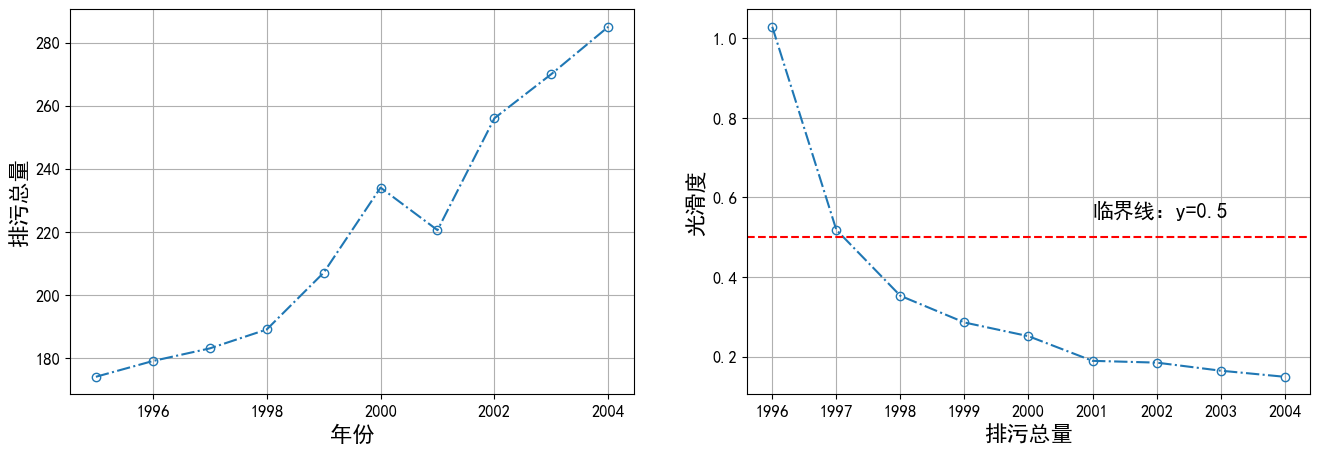

In [10]:
a = GrayPre()

a.fit(year,x0,xlabel='年份',ylabel='排污总量')

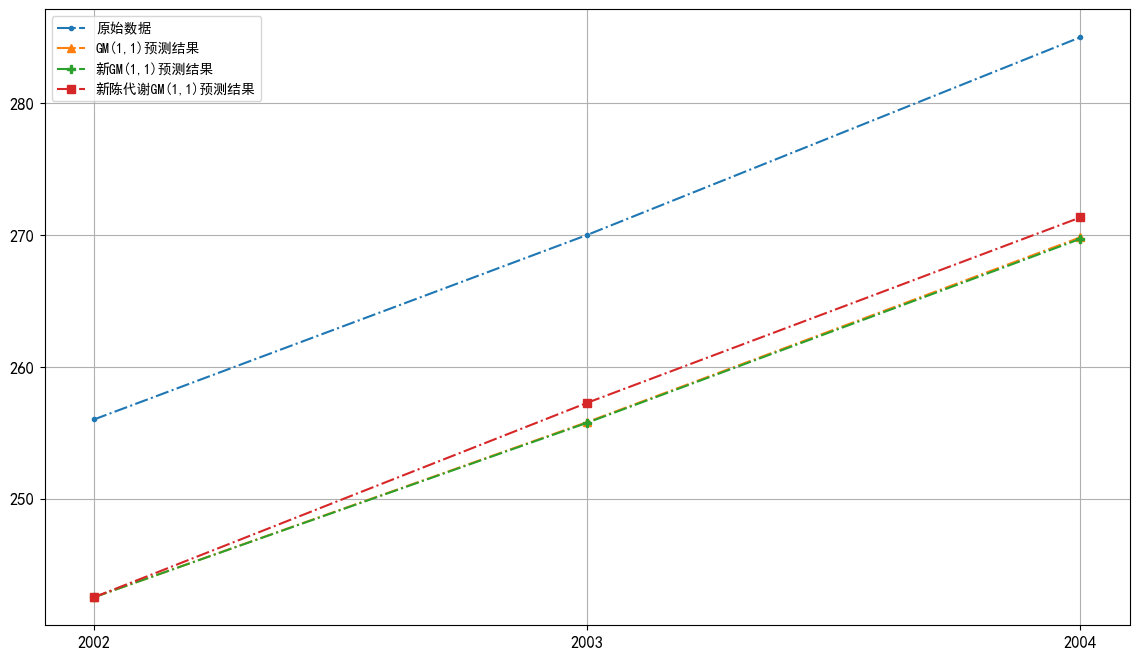

In [11]:
a.draw_all_result(test_percent=0.3)

In [12]:
a.compute_sse(test_percent=0.3)

传统GM(1,1)预测误差平方和： 614.0612058409841
新GM(1,1)预测误差平方和： 618.9622018729586
新陈代谢GM(1,1)预测误差平方和： 531.1548267471046


平均相对残差epsilon： [0.02599905]
平均级比偏差： [0.0470408]


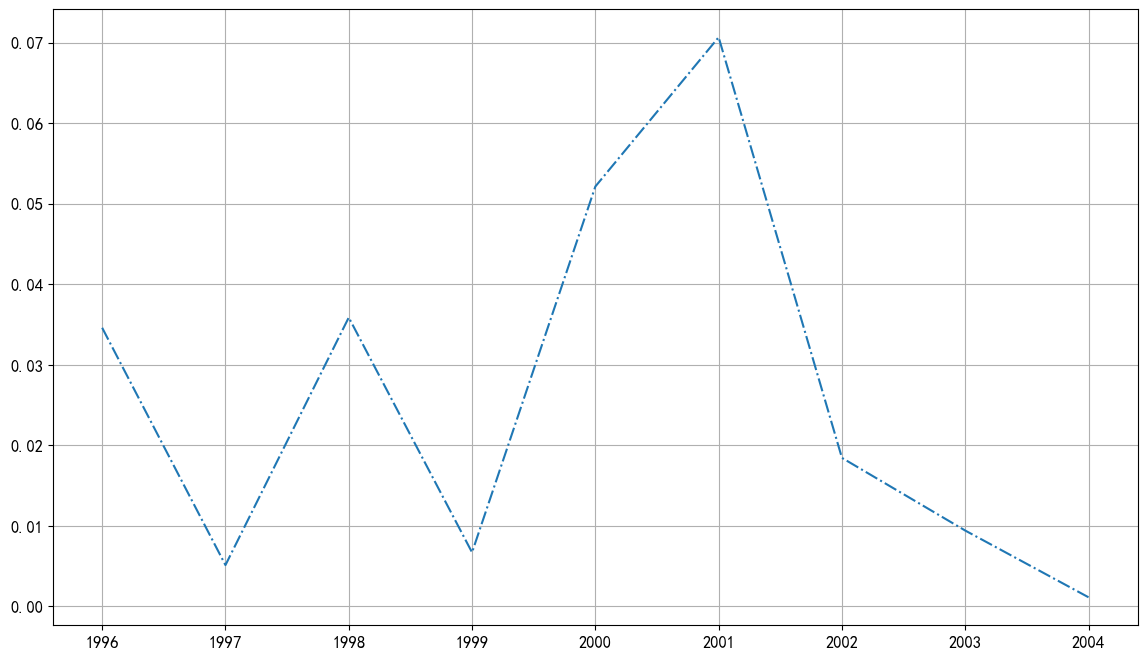

In [13]:
a.fit_test()

In [14]:
a.gm11(x0=x0)

array([[303.01223193],
       [322.52210378],
       [343.28814636]])

In [15]:
a.new_gm11(x0=x0)

array([[303.01223193],
       [322.4249731 ],
       [343.07034933]])

In [16]:
a.metab_gm11(x0=x0)

array([[303.01223193],
       [324.32543494],
       [346.03042862]])

[2005 2006 2007 2008 2009]
原始数据：
[[179. ]
 [183. ]
 [189. ]
 [207. ]
 [234. ]
 [220.5]
 [256. ]
 [270. ]
 [285. ]]
拟合数据：
[[172.80895647]
 [183.93550596]
 [195.77845411]
 [208.38392724]
 [221.80102163]
 [236.08199464]
 [251.28246834]
 [267.46164606]
 [284.68254307]]
预测数据：
[[303.01223193]
 [324.32543494]
 [346.03042862]
 [367.45744562]
 [390.85680292]]


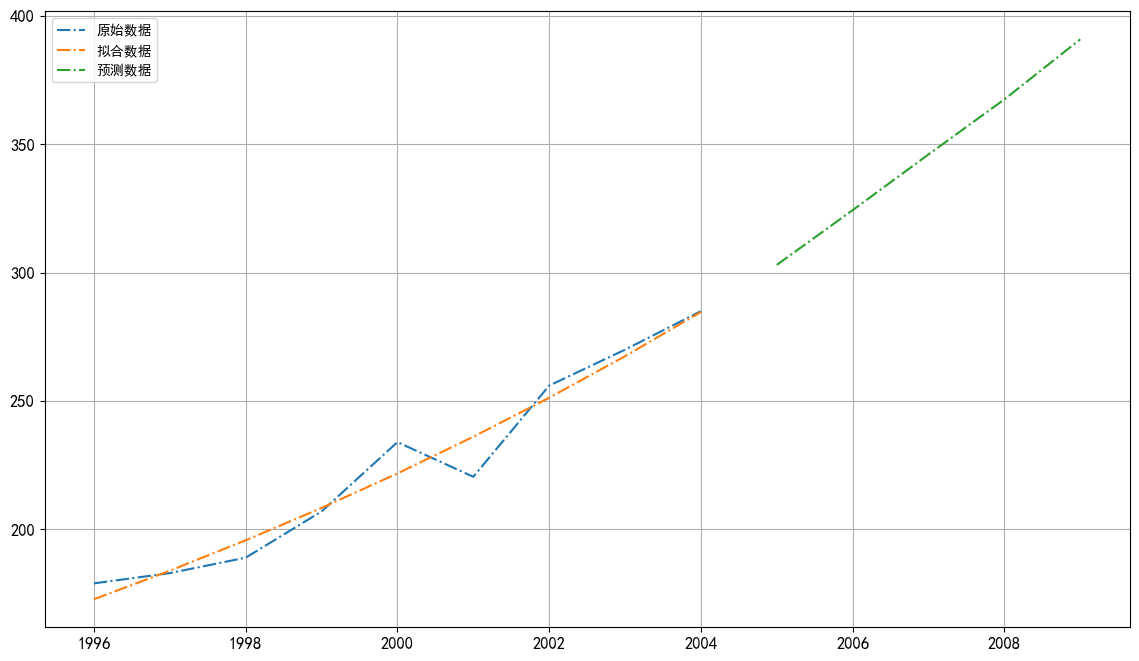

In [17]:
a.draw_result(pre_num=5)